In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/data/movies.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
df['rating'].value_counts()

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

In [5]:
df['genre'].value_counts()

Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: genre, dtype: int64

* name : 영화 제목
* rating : 영화 관람 등급
    * R : 17세 이상 관람가
    * PG-13 : 14세 이상 관람가
    * PG : 모든 연령 가능(부모 동반 요망)
    * Not Rated : 일반 극장에서 상영 불가
    * G : 전체 괌람가
    * Unrated : 무등급판(무삭제판?)
    * NC-17 : 청소년 관람불가
    * TV-MA : 청소년 관람불가 (드라마 시청등급)
    * TV- PG : 모든 연령 가능 (부모 동반 요망 - 드라마 시청등급)
    * X : 청소년 관람불과 / NC-17의 옛날 버전
    * Approved : ?
    * TV-14 : 15세 이상 관람가(드라마 시청등급)
* genre : 영화 장르
* year : 개봉 연도
* released : 개봉일
* score : IMDb 사용자 평가(평점)
* votes : 사용자 투표 수
* director : 감독
* writier : 영화 작가
* star : 주연 배우
* country : 개봉 국가
* budget : 영화 예산 -> 없는 경우 0
* gross : 영화 수익
* company : 제작사
* runtime : 영화 상영 시간

In [14]:
df['year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

# 결측값 확인

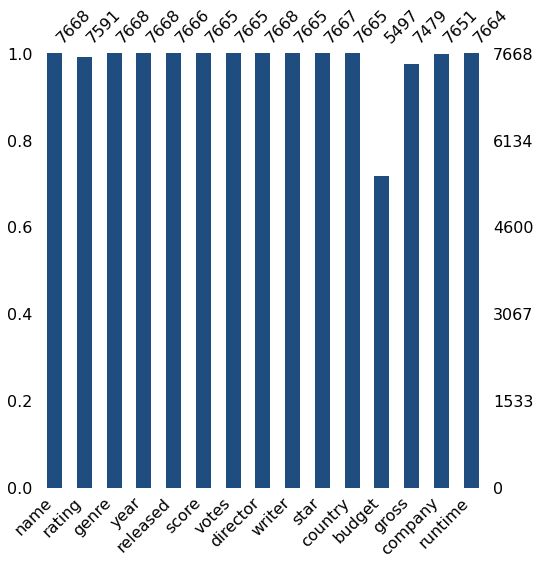

In [8]:
msno.bar(df= df, figsize = (8,8), color = (0.12,0.3,0.5))

In [10]:
for col in df.columns:
  msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df[col].isnull().sum() / df[col].shape[0]))
  print(msg)     

column:       name	 Percent of NaN value: 0.00%
column:     rating	 Percent of NaN value: 1.00%
column:      genre	 Percent of NaN value: 0.00%
column:       year	 Percent of NaN value: 0.00%
column:   released	 Percent of NaN value: 0.03%
column:      score	 Percent of NaN value: 0.04%
column:      votes	 Percent of NaN value: 0.04%
column:   director	 Percent of NaN value: 0.00%
column:     writer	 Percent of NaN value: 0.04%
column:       star	 Percent of NaN value: 0.01%
column:    country	 Percent of NaN value: 0.04%
column:     budget	 Percent of NaN value: 28.31%
column:      gross	 Percent of NaN value: 2.46%
column:    company	 Percent of NaN value: 0.22%
column:    runtime	 Percent of NaN value: 0.05%


In [11]:
df[df['rating'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
78,Babylon,NaN,Drama,1980,November 1980 (United Kingdom),7.4,1300.0,Franco Rosso,Franco Rosso,David N. Haynes,United Kingdom,NaN,109749.0,Diversity Music,95.0
91,Mantis Fist Fighter,NaN,Action,1980,"July 9, 1982 (United States)",6.7,230.0,Wing-Cho Yip,Hsin-Yi Chang,Ka-Yan Leung,Hong Kong,NaN,NaN,East Asia Film Company,89.0
102,Das Boot,NaN,Adventure,1981,"February 10, 1982 (United States)",8.3,237000.0,Wolfgang Petersen,Wolfgang Petersen,Jürgen Prochnow,West Germany,NaN,11487676.0,Bavaria Film,149.0
298,The State of Things,NaN,Drama,1982,"February 18, 1983 (United States)",7.0,3000.0,Wim Wenders,Robert Kramer,Allen Garfield,West Germany,NaN,3700.0,Gray City,121.0
464,White Star,NaN,Drama,1983,"March 8, 1985 (West Germany)",6.0,235.0,Roland Klick,Karen Jaehne-Lathan,Dennis Hopper,West Germany,100000.0,NaN,NaN,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [12]:
df[df['budget'] == 0]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


# 변수 별 시각화

## name

* 같은 이름의 영화가 있을까?

In [17]:
dup = df.duplicated(['name'], keep = False) # keep = False -> 중복이면 무조건 True
dup

0       False
1       False
2       False
3       False
4       False
        ...  
7663    False
7664    False
7665    False
7666    False
7667    False
Length: 7668, dtype: bool

In [18]:
df_dup = pd.concat([df, dup], axis = 1)
df_dup.rename(columns = {0 : 'Dup'}, inplace = True)
df_dup

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Dup
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,False
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,False
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,False
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,False
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,False
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,False
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,False
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,False


In [19]:
df_same_movie_name = df_dup[df_dup['Dup'] == True]
df_same_movie_name

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Dup
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0,True
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0,True
18,The Fog,R,Horror,1980,"February 8, 1980 (United States)",6.8,66000.0,John Carpenter,John Carpenter,Adrienne Barbeau,United States,1000000.0,21448782.0,AVCO Embassy Pictures,89.0,True
31,Prom Night,R,Horror,1980,"July 18, 1980 (United States)",5.4,16000.0,Paul Lynch,William Gray,Leslie Nielsen,Canada,NaN,14796236.0,Guardian Trust Company,92.0,True
46,The Island,R,Action,1980,"June 13, 1980 (United States)",5.3,3900.0,Michael Ritchie,Peter Benchley,Michael Caine,United States,22000000.0,15716828.0,Universal Pictures,109.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7526,The Kid,R,Biography,2019,"March 8, 2019 (United States)",5.9,7400.0,Vincent D'Onofrio,Vincent D'Onofrio,Jake Schur,United States,8000000.0,1561698.0,Mimran Schur Pictures,100.0,True
7529,Child's Play,R,Drama,2019,"June 21, 2019 (United States)",5.8,47000.0,Lars Klevberg,Tyler Burton Smith,Tim Matheson,Canada,10000000.0,44907074.0,Orion Pictures,90.0,True
7536,Shaft,R,Action,2019,"June 14, 2019 (United States)",6.4,48000.0,Tim Story,Ernest Tidyman,Samuel L. Jackson,United States,35000000.0,21360215.0,Davis Entertainment,111.0,True
7556,After the Wedding,PG-13,Drama,2019,"November 1, 2019 (United Kingdom)",6.3,6700.0,Bart Freundlich,Bart Freundlich,Julianne Moore,United States,NaN,2790019.0,Sony Pictures Classics,112.0,True


In [20]:
df_same_movie_name['name'].value_counts()

Hamlet            3
Pulse             3
Nobody's Fool     3
Hercules          3
Anna              3
                 ..
Dream Lover       2
RoboCop           2
Overboard         2
The Stepfather    2
The Captain       2
Name: name, Length: 149, dtype: int64

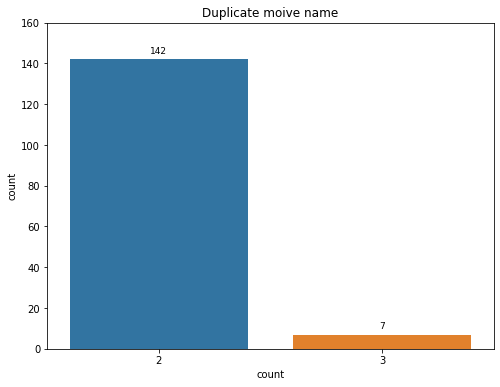

In [41]:
df_count = pd.DataFrame(df_same_movie_name['name'].value_counts())
df_count.rename(columns = {'name' : 'count'}, inplace = True)

plt.figure(figsize = (8,6))
ax = sns.countplot('count', data=df_count)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.title('Duplicate moive name')
ax.set_ylim(0,160)
plt.show()

* 같은 이름의 영화가 존재한다.
    * 2번 중복 : 142개
    * 3변 중복 : 7개

In [70]:
# 3번 중복 영화
df_3 = df_count[df_count['count'] == 3]
df_3.index

df_3_movie = pd.DataFrame()

for i in df_3.index:
    df_new = df[df['name'] == i]
    df_3_movie = pd.concat([df_3_movie, df_new])

df_3_movie

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1706,Hamlet,PG,Drama,1990,"January 18, 1991 (United States)",6.7,22000.0,Franco Zeffirelli,William Shakespeare,Mel Gibson,United States,NaN,20710451.0,Icon Productions,135.0
2888,Hamlet,PG-13,Drama,1996,"December 25, 1996 (United States)",7.7,37000.0,Kenneth Branagh,William Shakespeare,Kenneth Branagh,United Kingdom,18000000.0,4770222.0,Castle Rock Entertainment,242.0
3776,Hamlet,R,Drama,2000,"June 23, 2000 (United States)",6.0,9200.0,Michael Almereyda,William Shakespeare,Ethan Hawke,United States,2000000.0,2046433.0,double A Films,112.0
1403,Pulse,PG-13,Horror,1988,"March 4, 1988 (United States)",5.4,2300.0,Paul Golding,Paul Golding,Cliff De Young,United States,6000000.0,40397.0,Aspen Film Society,91.0
3938,Pulse,R,Horror,2001,"November 9, 2005 (United States)",6.6,18000.0,Kiyoshi Kurosawa,Kiyoshi Kurosawa,Haruhiko Katô,Japan,NaN,318451.0,Daiei Eiga,119.0
5023,Pulse,PG-13,Horror,2006,"August 11, 2006 (United States)",4.8,28000.0,Jim Sonzero,Kiyoshi Kurosawa,Kristen Bell,United States,20500000.0,29907685.0,Dimension Films,90.0
1039,Nobody's Fool,PG-13,Comedy,1986,"November 7, 1986 (United States)",5.5,754.0,Evelyn Purcell,Beth Henley,Rosanna Arquette,United States,NaN,563358.0,Island Pictures,107.0
2537,Nobody's Fool,R,Comedy,1994,"January 13, 1995 (United States)",7.4,19000.0,Robert Benton,Richard Russo,Paul Newman,United States,20000000.0,39491975.0,Capella International,110.0
7439,Nobody's Fool,R,Comedy,2018,"November 2, 2018 (United States)",4.9,7000.0,Tyler Perry,Tyler Perry,Tiffany Haddish,United States,19000000.0,33705333.0,BET Films,110.0
406,Hercules,PG,Adventure,1983,"August 26, 1983 (United States)",4.0,3600.0,Luigi Cozzi,Luigi Cozzi,Lou Ferrigno,Italy,2500000.0,10676194.0,Cannon Films Inc.,98.0


## rating

In [71]:
df['rating'].value_counts()

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

In [80]:
df[df['rating'] == 'TV-14']

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7607,Furie,TV-14,Action,2019,"February 22, 2019 (Vietnam)",6.3,4200.0,Le-Van Kiet,Le-Van Kiet,Veronica Ngo,Vietnam,NaN,5756185.0,Premiere Picture,98.0


In [83]:
df[df['rating'] == 'Approved']

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
120,Tarzan the Ape Man,Approved,Adventure,1981,"July 24, 1981 (United States)",3.4,5300.0,John Derek,Tom Rowe,Bo Derek,United States,6500000.0,36565280.0,Metro-Goldwyn-Mayer (MGM),115.0


In [82]:
# 등급 조정
df = df.replace({'rating' : 'TV-14'}, 'PG-13') # TV-14는 PG-13 정도

df['rating'].value_counts()

R            3697
PG-13        2113
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
Name: rating, dtype: int64

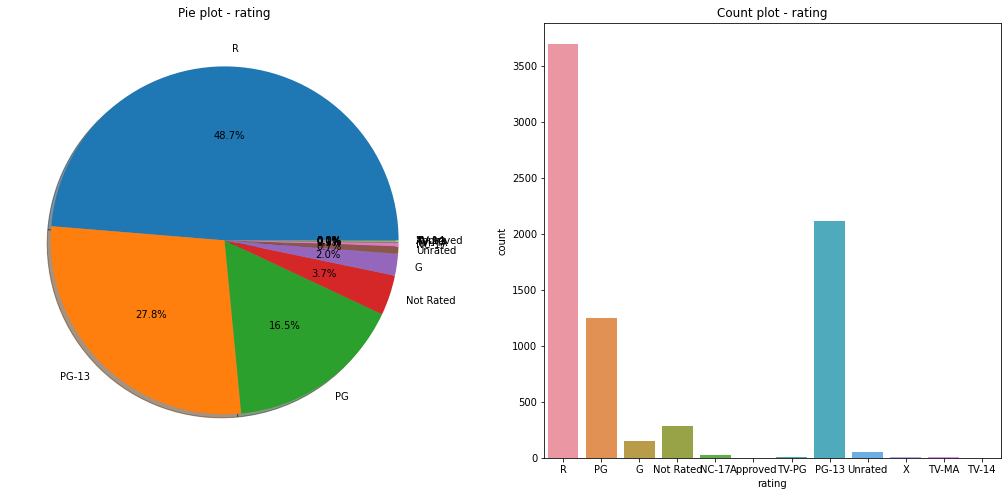

In [77]:
f, ax = plt.subplots(1, 2, figsize = (18,8))


df['rating'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - rating')
ax[0].set_ylabel('')
sns.countplot('rating', data=df, ax=ax[1])
ax[1].set_title('Count plot - rating')

plt.show()

# 10년 주기로 평점이 높은 영화는 무엇이었을까? 그 영화들의 장르는 무엇이었을까?

In [20]:
# 10년 주기로 데이터 나누기
df_80 = df[df['year'] < 1990]
df_90 = df[(df['year'] >= 1990) & (df['year'] < 2000)]
df_00 = df[(df['year'] >= 2000) & (df['year'] < 2010)]
df_10 = df[(df['year'] >= 2010) & (df['year'] < 2020)]
df_20 = df[df['year'] == 2020]

## 평점 높은 순으로 정렬

In [23]:
# 80년대
df_80.sort_values(by='score', ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
645,Back to the Future,PG,Adventure,1985,"July 3, 1985 (United States)",8.5,1100000.0,Robert Zemeckis,Robert Zemeckis,Michael J. Fox,United States,19000000.0,381906762.0,Universal Pictures,116.0
1257,Cinema Paradiso,PG,Drama,1988,"February 23, 1990 (United States)",8.5,239000.0,Giuseppe Tornatore,Giuseppe Tornatore,Philippe Noiret,Italy,5000000.0,13019063.0,Cristaldifilm,155.0
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
92,Indiana Jones and the Raiders of the Lost Ark,PG,Action,1981,"June 12, 1981 (United States)",8.4,905000.0,Steven Spielberg,Lawrence Kasdan,Harrison Ford,United States,18000000.0,389925971.0,Paramount Pictures,115.0


In [24]:
# 90년대
df_90.sort_values(by='score', ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,28817291.0,Castle Rock Entertainment,142.0
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,322161245.0,Universal Pictures,195.0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,213928762.0,Miramax,154.0
3444,Fight Club,R,Drama,1999,"October 15, 1999 (United States)",8.8,1900000.0,David Fincher,Chuck Palahniuk,Brad Pitt,Germany,63000000.0,101209702.0,Fox 2000 Pictures,139.0
2445,Forrest Gump,PG-13,Drama,1994,"July 6, 1994 (United States)",8.8,1900000.0,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000.0,678226133.0,Paramount Pictures,142.0


In [25]:
# 00년대
df_00.sort_values(by='score', ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1.146031e+09,New Line Cinema,201.0
3845,The Lord of the Rings: The Fellowship of the Ring,PG-13,Action,2001,"December 19, 2001 (United States)",8.8,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,93000000.0,8.976901e+08,New Line Cinema,178.0
4048,The Lord of the Rings: The Two Towers,PG-13,Action,2002,"December 18, 2002 (United States)",8.7,1500000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,9.474951e+08,New Line Cinema,179.0
4053,City of God,R,Crime,2002,"February 13, 2004 (United States)",8.6,714000.0,Fernando Meirelles,Paulo Lins,Alexandre Rodrigues,Brazil,NaN,3.068079e+07,O2 Filmes,130.0


In [26]:
# 10년대
df_10.sort_values(by='score', ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5643,Inception,PG-13,Action,2010,"July 16, 2010 (United States)",8.8,2100000.0,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,160000000.0,836836967.0,Warner Bros.,148.0
7452,Parasite,R,Comedy,2019,"November 8, 2019 (United States)",8.6,631000.0,Bong Joon Ho,Bong Joon Ho,Kang-ho Song,South Korea,11400000.0,258908054.0,Barunson E&A,132.0
6444,Interstellar,PG-13,Adventure,2014,"November 7, 2014 (United States)",8.6,1600000.0,Christopher Nolan,Jonathan Nolan,Matthew McConaughey,United States,165000000.0,701729206.0,Paramount Pictures,169.0
6450,Whiplash,R,Drama,2014,"October 15, 2014 (Philippines)",8.5,749000.0,Damien Chazelle,Damien Chazelle,Miles Teller,United States,3300000.0,49396747.0,Bold Films,106.0
5853,The Intouchables,R,Biography,2011,"November 2, 2011 (France)",8.5,785000.0,Olivier Nakache,Olivier Nakache,François Cluzet,France,NaN,426588510.0,Quad Productions,112.0


In [27]:
# 20년대
df_20.sort_values(by='score', ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7643,Tenet,PG-13,Action,2020,"September 3, 2020 (United States)",7.4,387000.0,Christopher Nolan,Christopher Nolan,John David Washington,United States,205000000.0,363656624.0,Warner Bros.,150.0
7647,Onward,PG,Animation,2020,"March 6, 2020 (United States)",7.4,120000.0,Dan Scanlon,Dan Scanlon,Tom Holland,United States,NaN,141950608.0,Walt Disney Pictures,102.0
7646,The Invisible Man,R,Drama,2020,"February 28, 2020 (United States)",7.1,186000.0,Leigh Whannell,Leigh Whannell,Elisabeth Moss,Canada,7000000.0,143151000.0,Universal Pictures,124.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


## 년대별 평균 평점

In [33]:
print("1980년대 평균 평점 : {}".format(round(df_80['score'].mean(),1)))
print("1990년대 평균 평점 : {}".format(round(df_90['score'].mean(),1)))
print("2000년대 평균 평점 : {}".format(round(df_00['score'].mean(),1)))
print("2010년대 평균 평점 : {}".format(round(df_10['score'].mean(),1)))
print("2020년 평균 평점 : {}".format(round(df_20['score'].mean(),1)))

1980년대 평균 평점 : 6.2
1990년대 평균 평점 : 6.4
2000년대 평균 평점 : 6.4
2010년대 평균 평점 : 6.5
2020년 평균 평점 : 6.0


# Marvel 영화

In [39]:
iron_man = df[df['name'].str.contains('Iron Man')]
iron_man

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5245,Iron Man,PG-13,Action,2008,"May 2, 2008 (United States)",7.9,969000.0,Jon Favreau,Mark Fergus,Robert Downey Jr.,United States,140000000.0,5.857962e+08,Paramount Pictures,126.0
5644,Iron Man 2,PG-13,Action,2010,"May 7, 2010 (United States)",7.0,746000.0,Jon Favreau,Justin Theroux,Robert Downey Jr.,United States,200000000.0,6.239333e+08,Paramount Pictures,124.0
6244,Iron Man 3,PG-13,Action,2013,"May 3, 2013 (United States)",7.1,779000.0,Shane Black,Drew Pearce,Robert Downey Jr.,United States,200000000.0,1.214811e+09,Marvel Studios,130.0


In [43]:
hulk = df[(df['name'].str.contains('Hulk')) & (df['year'] == 2008)]
hulk

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5246,The Incredible Hulk,PG-13,Action,2008,"June 13, 2008 (United States)",6.7,448000.0,Louis Leterrier,Zak Penn,Edward Norton,United States,150000000.0,264770996.0,Universal Pictures,112.0


In [44]:
thor = df[(df['name'].str.contains('Thor')) & (df['genre'] == 'Action')]
thor

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5844,Thor,PG-13,Action,2011,"May 6, 2011 (United States)",7.0,772000.0,Kenneth Branagh,Ashley Miller,Chris Hemsworth,United States,150000000.0,449326618.0,Paramount Pictures,115.0
6247,Thor: The Dark World,PG-13,Action,2013,"November 8, 2013 (United States)",6.8,618000.0,Alan Taylor,Christopher L. Yost,Chris Hemsworth,United States,170000000.0,644783140.0,Marvel Studios,112.0
7043,Thor: Ragnarok,PG-13,Action,2017,"November 3, 2017 (United States)",7.9,628000.0,Taika Waititi,Eric Pearson,Chris Hemsworth,United States,180000000.0,853983911.0,Walt Disney Pictures,130.0


In [47]:
captain = df[df['name'].str.contains('Captain America')]
captain

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5843,Captain America: the First Avenger,PG-13,Action,2011,"July 22, 2011 (United States)",6.9,769000.0,Joe Johnston,Christopher Markus,Chris Evans,United States,140000000.0,3.705698e+08,Paramount Pictures,124.0
6448,Captain America: The Winter Soldier,PG-13,Action,2014,"April 4, 2014 (United States)",7.7,764000.0,Anthony Russo,Christopher Markus,Chris Evans,United States,170000000.0,7.144215e+08,Marvel Entertainment,136.0
6846,Captain America: Civil War,PG-13,Action,2016,"May 6, 2016 (United States)",7.8,694000.0,Anthony Russo,Christopher Markus,Chris Evans,United States,250000000.0,1.153337e+09,Marvel Studios,147.0


In [49]:
avengers = df[(df['name'].str.contains('Avengers')) & (df['year'] >= 2012)]
avengers

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000.0,1.518816e+09,Marvel Studios,143.0
6644,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",7.3,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000.0,1.402810e+09,Marvel Studios,141.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0


In [55]:
galaxy = df[(df['name'].str.contains('Galaxy')) & (df['genre'] == 'Action')]
galaxy

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6443,Guardians of the Galaxy,PG-13,Action,2014,"August 1, 2014 (United States)",8.0,1100000.0,James Gunn,James Gunn,Chris Pratt,United States,170000000.0,773350147.0,Marvel Studios,121.0
7049,Guardians of the Galaxy Vol. 2,PG-13,Action,2017,"May 5, 2017 (United States)",7.6,596000.0,James Gunn,James Gunn,Chris Pratt,United States,200000000.0,863756051.0,Marvel Studios,136.0


In [58]:
ant = df[df['name'].str.contains('Ant-Man')]
ant

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6648,Ant-Man,PG-13,Action,2015,"July 17, 2015 (United States)",7.3,595000.0,Peyton Reed,Edgar Wright,Paul Rudd,United States,130000000.0,519311965.0,Gary Sanchez Productions,117.0
7257,Ant-Man and the Wasp,PG-13,Action,2018,"July 6, 2018 (United States)",7.0,333000.0,Peyton Reed,Chris McKenna,Paul Rudd,United States,162000000.0,622674139.0,Marvel Studios,118.0


In [68]:
spider = df[(df['name'].str.contains('Spider')) & (df['star'].str.contains('Tom'))]
spider

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7047,Spider-Man: Homecoming,PG-13,Action,2017,"July 7, 2017 (United States)",7.4,540000.0,Jon Watts,Jonathan Goldstein,Tom Holland,United States,175000000.0,8.801669e+08,Columbia Pictures,133.0
7458,Spider-Man: Far from Home,PG-13,Action,2019,"July 2, 2019 (United States)",7.5,359000.0,Jon Watts,Chris McKenna,Tom Holland,United States,160000000.0,1.131928e+09,Columbia Pictures,129.0


In [75]:
other = df[(df['name'].str.contains('Doctor Strange')) | (df['name'].str.contains('Black Panther')) | (df['name'].str.contains('Captain Marvel'))]
other

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6849,Doctor Strange,PG-13,Action,2016,"November 4, 2016 (United States)",7.5,628000.0,Scott Derrickson,Jon Spaihts,Benedict Cumberbatch,United States,165000000.0,6.777961e+08,Marvel Studios,115.0
7247,Black Panther,PG-13,Action,2018,"February 16, 2018 (United States)",7.3,661000.0,Ryan Coogler,Ryan Coogler,Chadwick Boseman,United States,200000000.0,1.347598e+09,Marvel Studios,134.0
7456,Captain Marvel,PG-13,Action,2019,"March 8, 2019 (United States)",6.8,478000.0,Anna Boden,Anna Boden,Brie Larson,United States,160000000.0,1.128463e+09,Walt Disney Pictures,123.0


In [91]:
# 데이터 합치기
df_marvel = pd.concat([iron_man, hulk, thor, captain, avengers, galaxy, ant, spider, other])


# 개봉 순으로 정렬
df_marvel = df_marvel.sort_values(by=['year','released'])
df_marvel

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5246,The Incredible Hulk,PG-13,Action,2008,"June 13, 2008 (United States)",6.7,448000.0,Louis Leterrier,Zak Penn,Edward Norton,United States,150000000.0,2.647710e+08,Universal Pictures,112.0
5245,Iron Man,PG-13,Action,2008,"May 2, 2008 (United States)",7.9,969000.0,Jon Favreau,Mark Fergus,Robert Downey Jr.,United States,140000000.0,5.857962e+08,Paramount Pictures,126.0
5644,Iron Man 2,PG-13,Action,2010,"May 7, 2010 (United States)",7.0,746000.0,Jon Favreau,Justin Theroux,Robert Downey Jr.,United States,200000000.0,6.239333e+08,Paramount Pictures,124.0
5843,Captain America: the First Avenger,PG-13,Action,2011,"July 22, 2011 (United States)",6.9,769000.0,Joe Johnston,Christopher Markus,Chris Evans,United States,140000000.0,3.705698e+08,Paramount Pictures,124.0
5844,Thor,PG-13,Action,2011,"May 6, 2011 (United States)",7.0,772000.0,Kenneth Branagh,Ashley Miller,Chris Hemsworth,United States,150000000.0,4.493266e+08,Paramount Pictures,115.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000.0,1.518816e+09,Marvel Studios,143.0
6244,Iron Man 3,PG-13,Action,2013,"May 3, 2013 (United States)",7.1,779000.0,Shane Black,Drew Pearce,Robert Downey Jr.,United States,200000000.0,1.214811e+09,Marvel Studios,130.0
6247,Thor: The Dark World,PG-13,Action,2013,"November 8, 2013 (United States)",6.8,618000.0,Alan Taylor,Christopher L. Yost,Chris Hemsworth,United States,170000000.0,6.447831e+08,Marvel Studios,112.0
6448,Captain America: The Winter Soldier,PG-13,Action,2014,"April 4, 2014 (United States)",7.7,764000.0,Anthony Russo,Christopher Markus,Chris Evans,United States,170000000.0,7.144215e+08,Marvel Entertainment,136.0
6443,Guardians of the Galaxy,PG-13,Action,2014,"August 1, 2014 (United States)",8.0,1100000.0,James Gunn,James Gunn,Chris Pratt,United States,170000000.0,7.733501e+08,Marvel Studios,121.0


In [92]:
df_marvel['released'] = df_marvel['released'].str.split(' ')
df_marvel['released']

5246        [June, 13,, 2008, (United, States)]
5245          [May, 2,, 2008, (United, States)]
5644          [May, 7,, 2010, (United, States)]
5843        [July, 22,, 2011, (United, States)]
5844          [May, 6,, 2011, (United, States)]
6043          [May, 4,, 2012, (United, States)]
6244          [May, 3,, 2013, (United, States)]
6247     [November, 8,, 2013, (United, States)]
6448        [April, 4,, 2014, (United, States)]
6443       [August, 1,, 2014, (United, States)]
6648        [July, 17,, 2015, (United, States)]
6644          [May, 1,, 2015, (United, States)]
6846          [May, 6,, 2016, (United, States)]
6849     [November, 4,, 2016, (United, States)]
7047         [July, 7,, 2017, (United, States)]
7049          [May, 5,, 2017, (United, States)]
7043     [November, 3,, 2017, (United, States)]
7244       [April, 27,, 2018, (United, States)]
7247    [February, 16,, 2018, (United, States)]
7257         [July, 6,, 2018, (United, States)]
7445       [April, 26,, 2019, (United, S

# 영화 회사 비교

In [9]:
df['company'].value_counts().head(20)

Universal Pictures           377
Warner Bros.                 334
Columbia Pictures            332
Paramount Pictures           320
Twentieth Century Fox        240
New Line Cinema              174
Touchstone Pictures          132
Metro-Goldwyn-Mayer (MGM)    125
Walt Disney Pictures         123
TriStar Pictures              94
Dreamworks Pictures           76
Miramax                       74
Fox 2000 Pictures             63
Orion Pictures                60
Summit Entertainment          60
Castle Rock Entertainment     59
Lionsgate                     58
Fox Searchlight Pictures      57
Dimension Films               56
Screen Gems                   56
Name: company, dtype: int64

In [11]:
top10company = df['company'].value_counts().head(10).index
top10company

Index(['Universal Pictures', 'Warner Bros.', 'Columbia Pictures',
       'Paramount Pictures', 'Twentieth Century Fox', 'New Line Cinema',
       'Touchstone Pictures', 'Metro-Goldwyn-Mayer (MGM)',
       'Walt Disney Pictures', 'TriStar Pictures'],
      dtype='object')

In [15]:
top20company = df['company'].value_counts().head(20).index
top20company

Index(['Universal Pictures', 'Warner Bros.', 'Columbia Pictures',
       'Paramount Pictures', 'Twentieth Century Fox', 'New Line Cinema',
       'Touchstone Pictures', 'Metro-Goldwyn-Mayer (MGM)',
       'Walt Disney Pictures', 'TriStar Pictures', 'Dreamworks Pictures',
       'Miramax', 'Fox 2000 Pictures', 'Orion Pictures',
       'Summit Entertainment', 'Castle Rock Entertainment', 'Lionsgate',
       'Fox Searchlight Pictures', 'Dimension Films', 'Screen Gems'],
      dtype='object')

In [18]:
top20company[:9]

Index(['Universal Pictures', 'Warner Bros.', 'Columbia Pictures',
       'Paramount Pictures', 'Twentieth Century Fox', 'New Line Cinema',
       'Touchstone Pictures', 'Metro-Goldwyn-Mayer (MGM)',
       'Walt Disney Pictures'],
      dtype='object')

In [22]:
top20company[10:20]

Index(['Dreamworks Pictures', 'Miramax', 'Fox 2000 Pictures', 'Orion Pictures',
       'Summit Entertainment', 'Castle Rock Entertainment', 'Lionsgate',
       'Fox Searchlight Pictures', 'Dimension Films', 'Screen Gems'],
      dtype='object')

In [25]:
df_top10 = pd.DataFrame()
df_top10_20 = pd.DataFrame()

for i in top20company[:10]:
     df_new = df[df['company'] == i]
     df_top10 = pd.concat([df_top10, df_new])

df_top10

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
23,Xanadu,PG,Fantasy,1980,"August 8, 1980 (United States)",5.3,12000.0,Robert Greenwald,Richard Christian Danus,Olivia Newton-John,United States,20000000.0,22762571.0,Universal Pictures,96.0
32,Smokey and the Bandit II,PG,Action,1980,"August 15, 1980 (United States)",5.3,15000.0,Hal Needham,Hal Needham,Burt Reynolds,United States,NaN,66132626.0,Universal Pictures,100.0
39,Coal Miner's Daughter,PG,Biography,1980,"March 7, 1980 (United States)",7.5,17000.0,Michael Apted,Thomas Rickman,Sissy Spacek,United States,NaN,67182787.0,Universal Pictures,124.0
43,Where the Buffalo Roam,R,Biography,1980,"April 25, 1980 (United States)",6.6,11000.0,Art Linson,Hunter S. Thompson,Peter Boyle,United States,NaN,6659377.0,Universal Pictures,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330,The Call,R,Crime,2013,"March 15, 2013 (United States)",6.7,115000.0,Brad Anderson,Richard D'Ovidio,Halle Berry,United States,13000000.0,68572631.0,TriStar Pictures,94.0
6549,Pompeii,PG-13,Action,2014,"February 21, 2014 (United States)",5.5,108000.0,Paul W.S. Anderson,Janet Scott Batchler,Kit Harington,Canada,100000000.0,117831631.0,TriStar Pictures,105.0
6627,Heaven Is for Real,PG,Biography,2014,"April 16, 2014 (United States)",5.8,26000.0,Randall Wallace,Randall Wallace,Greg Kinnear,United States,12000000.0,101982712.0,TriStar Pictures,99.0
7007,Money Monster,R,Crime,2016,"May 13, 2016 (United States)",6.5,96000.0,Jodie Foster,Jamie Linden,George Clooney,United States,27000000.0,93282604.0,TriStar Pictures,98.0


In [26]:
for i in top20company[10:20]:
     df_new = df[df['company'] == i]
     df_top10_20 = pd.concat([df_top10_20, df_new])

df_top10_20

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3106,Amistad,R,Biography,1997,"December 25, 1997 (United States)",7.3,73000.0,Steven Spielberg,David Franzoni,Djimon Hounsou,United States,36000000.0,44229441.0,Dreamworks Pictures,155.0
3116,The Peacemaker,R,Action,1997,"September 26, 1997 (United States)",6.0,55000.0,Mimi Leder,Leslie Cockburn,George Clooney,United States,50000000.0,110463140.0,Dreamworks Pictures,124.0
3120,Mousehunt,PG,Comedy,1997,"December 19, 1997 (United States)",6.5,53000.0,Gore Verbinski,Adam Rifkin,Nathan Lane,United States,38000000.0,122417389.0,Dreamworks Pictures,98.0
3244,Saving Private Ryan,R,Drama,1998,"July 24, 1998 (United States)",8.6,1300000.0,Steven Spielberg,Robert Rodat,Tom Hanks,United States,70000000.0,482349603.0,Dreamworks Pictures,169.0
3314,Antz,PG,Animation,1998,"October 2, 1998 (United States)",6.5,149000.0,Eric Darnell,Todd Alcott,Woody Allen,United States,105000000.0,171757863.0,Dreamworks Pictures,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7330,Searching,PG-13,Drama,2018,"August 31, 2018 (United States)",7.6,148000.0,Aneesh Chaganty,Aneesh Chaganty,John Cho,United States,880000.0,75462037.0,Screen Gems,102.0
7345,Slender Man,PG-13,Horror,2018,"August 10, 2018 (United States)",3.2,30000.0,Sylvain White,David Birke,Joey King,United States,10000000.0,51738549.0,Screen Gems,93.0
7407,The Possession of Hannah Grace,R,Horror,2018,"November 30, 2018 (United States)",5.2,20000.0,Diederik Van Rooijen,Brian Sieve,Shay Mitchell,United States,7700000.0,43016528.0,Screen Gems,86.0
7495,Brightburn,R,Drama,2019,"May 24, 2019 (United States)",6.1,87000.0,David Yarovesky,Brian Gunn,Elizabeth Banks,United States,6000000.0,32893421.0,Screen Gems,90.0


In [63]:
pd.options.display.float_format = '{:.0f}'.format

df_top10.groupby('year').agg({'budget' : 'mean',
                              'gross'  : 'mean'})

,budget,gross
year,,
1980,11271875,33798695
1981,10541176,34426515
1982,13880769,52172004
1983,13770000,26014789
1984,14086818,48786002
1985,14745455,31844004
1986,15137143,41363054
1987,18341935,46322817
1988,15963043,41399901


In [65]:
df_top10_20.groupby('year').agg({'budget' : 'mean',
                                 'gross'  : 'mean'})

,budget,gross
year,,
1980,6000000,39846344
1981,11650000,23736602
1982,NaN,42914
1984,8833333,13605190
1985,5750000,18788901
1986,10100000,32529704
1987,12125000,24571694
1988,10500000,23825178
1989,17000000,26998998


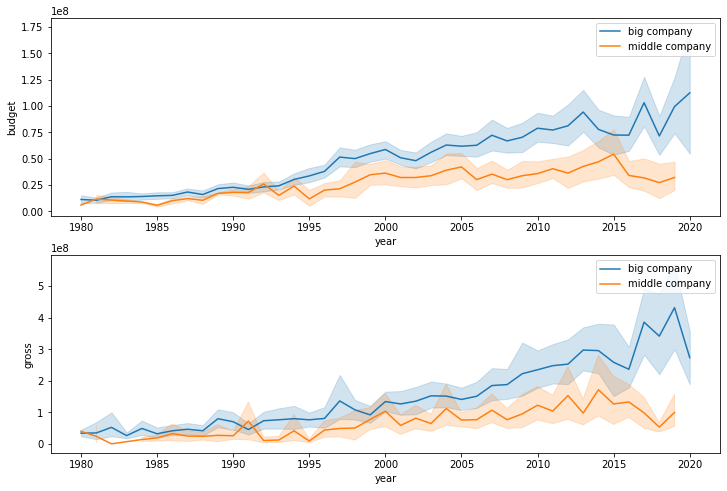

In [57]:
plt.figure(figsize = (12,8))
plt.subplot(2,1,1)
sns.lineplot(data = df_top10, x = 'year', y = 'budget')
sns.lineplot(data = df_top10_20, x = 'year', y = 'budget')
plt.legend(['big company', 'middle company'])
# plt.ylim([0, 112400000])


plt.subplot(2,1,2)
sns.lineplot(data = df_top10, x = 'year', y = 'gross')
sns.lineplot(data = df_top10_20, x = 'year', y = 'gross')
plt.legend(['big company', 'middle company'])


plt.show()